In [1]:
## System
import sys
import os
from collections import defaultdict

## Pandas
import pandas as pd
import numpy as np

## Plotting 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Fig utils 
from fig_utils import get_normalized_matrix_per_label


In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
## Substituion matrix file path
autosome_subt_matrix = "../data/ConSplice.substitution_matrix.chrX.txt"

In [3]:
## Read in subt matrix into pandas data frame
subt_counts = pd.read_csv(autosome_subt_matrix, sep = "\t", header = 5, index_col = False).rename(columns = {"#ref":"ref"})

In [4]:
## Get the substitution rate for each SpliceAI bin and ref allele combo
by_ref_subt_rate = defaultdict(lambda: defaultdict(float))
subt_counts.groupby(["delta_score_bin"]).apply(get_normalized_matrix_per_label, mutation_rate_dict = by_ref_subt_rate)

""


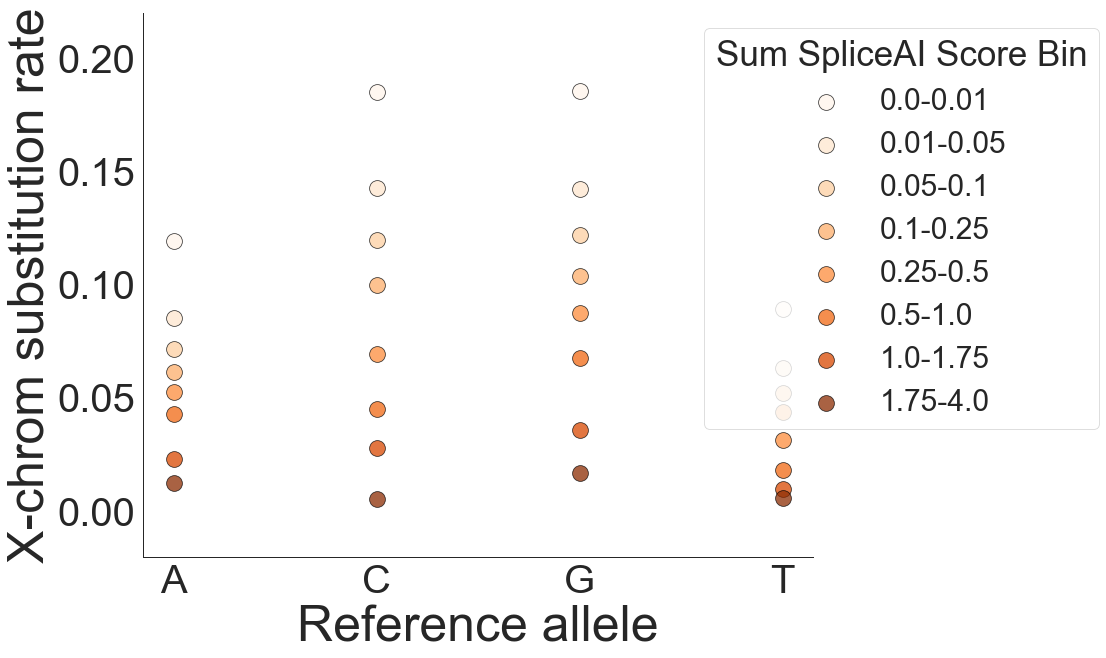

In [6]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(figsize = (12,10))
sns.set(font='Arial', style = "white")
sns.set_context("paper", font_scale = 2)
sns.despine()

ref_list = ["A","C","G","T"]

plt.scatter(x= ref_list,y = [by_ref_subt_rate["0.0-0.01"]["zeroton"][ref] for ref in ref_list], color = "#FFF5EB", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "0.0-0.01")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["0.01-0.05"]["zeroton"][ref] for ref in ref_list],color = "#FEE6CE", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "0.01-0.05")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["0.05-0.1"]["zeroton"][ref] for ref in ref_list], color = "#FDD0A2", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "0.05-0.1")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["0.1-0.25"]["zeroton"][ref] for ref in ref_list], color = "#FDAE6B", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "0.1-0.25")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["0.25-0.5"]["zeroton"][ref] for ref in ref_list], color = "#FD8D3C", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "0.25-0.5")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["0.5-1.0"]["zeroton"][ref] for ref in ref_list],  color = "#F16913", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "0.5-1.0")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["1.0-1.75"]["zeroton"][ref] for ref in ref_list], color = "#D94801", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "1.0-1.75")
plt.scatter(x= ref_list,y = [by_ref_subt_rate["1.75-4.0"]["zeroton"][ref] for ref in ref_list], color = "#8C2D04", s=250, marker = "o", edgecolors='black', alpha = 0.75, label= "1.75-4.0")

plt.ylabel("X-chrom substitution rate", fontsize = 50)
plt.xlabel("Reference allele", fontsize = 50)
plt.yticks(np.arange(-0.1, 0.3, 0.05))
ax.tick_params(axis='x', labelsize= 40 )
ax.tick_params(axis='y', labelsize= 40 )
ax.legend(bbox_to_anchor = (1.45,1),loc="upper right", title = "Sum SpliceAI Score Bin", fontsize = 30, title_fontsize = 35)

plt.ylim(-0.02,0.22)

plt.savefig('../figures/suppl_figure1_B.svg')